In [1]:
from pyvisgen.simulation.utils import calc_ref_elev
from datetime import datetime
import pandas as pd
import numpy as np
import astropy.units as un
from astropy.time import Time
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from pyvisgen.layouts.layouts import get_array_layout

In [105]:
# try different observation dates
scan_start = datetime.strptime("22-6-2021 12:0:1", "%d-%m-%Y %H:%M:%S")

In [106]:
start_time = Time(scan_start.isoformat(), format="isot")

# try different intervals and integration times / units are seconds
interval = 360
num_scans = 1
scan_duration = 360
int_time = 15

time_lst = [
    start_time + interval * i * un.second + j * int_time * un.second
    for i in range(num_scans)
    for j in range(int(scan_duration / int_time) + 1)
]
time = Time(time_lst)
time.shape

(25,)

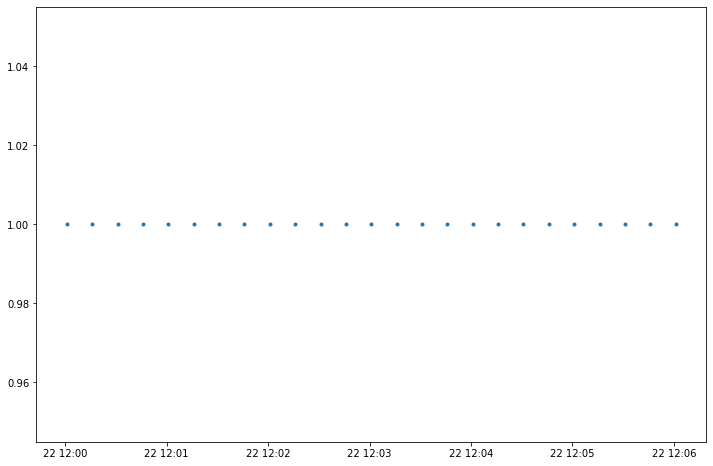

In [107]:
# plot time steps
plt.figure(figsize=(12,8))
plt.plot(time.datetime, np.ones(time.shape), marker=".", linestyle="none")

In [132]:
# try different source coordinates
src_crd = SkyCoord(
    ra=80,
    dec=50,
    unit=(un.deg, un.deg),
)

array_layout = get_array_layout("vlba")

_, el_st_all = calc_ref_elev(src_crd, time, array_layout)
print(el_st_all[0])

# this is fixed for the telescopes
el_min = 15
el_max = 75

valid = np.where((el_st_all >= el_min) & (el_st_all <= el_max), np.ones(el_st_all.shape), 0)
telescopes = valid * (np.arange(10) + 1)

[-13.61528899  17.90028096  25.44538921  35.78458166  48.28331698
  17.48271589  21.1844745   20.92628442  23.30978294  36.33956713]


In [133]:
valid

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 

(0.0, 11.0)

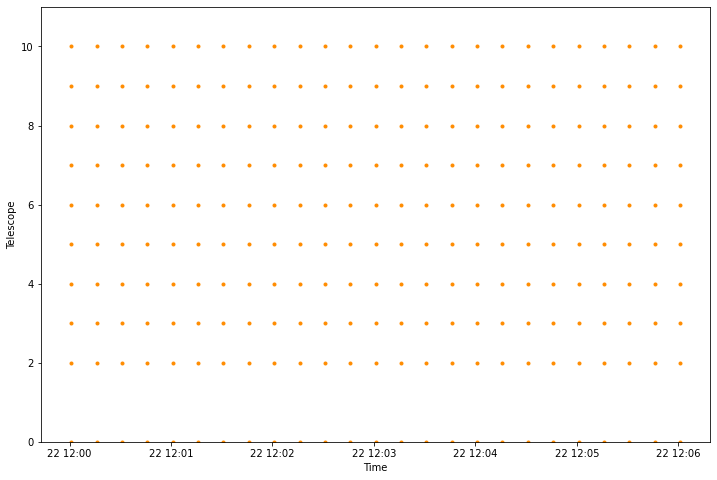

In [134]:
plt.figure(figsize=(12,8))
plt.plot(time.datetime, telescopes, color="darkorange", marker=".", linestyle="none")

plt.ylabel("Telescope")
plt.xlabel("Time")
plt.ylim(0, 11)